# Importing library

In [22]:
import numpy as np
import pandas as pd
import scipy as sc
from scipy import stats
from tqdm import *
from sklearn.preprocessing import normalize,minmax_scale,MinMaxScaler
from sklearn.metrics import log_loss,confusion_matrix,f1_score,accuracy_score,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

# Making class custom_model, which holds some functionality.

In [2]:
class custom_model:
    def __init__(self,features,layer1_node,layer2_node,classes,lr_rate,lambdas):
        # initializing all weights such as they will be normally distributed
        self.w_1 = np.random.normal(size=(features,layer1_node))
        self.w_2 = np.random.normal(size=(layer1_node,layer2_node))
        self.w_3 = np.random.normal(size=(layer2_node,classes))
        
        # initializing all b_i randomly
        self.b_1 = np.random.random()
        # print(self.b_1)
        self.b_2 = np.random.random()
        self.b_3 = np.random.random()
        
        # initializing k's uniformly
        self.k = np.random.uniform(size=(3,1))
        # self.k = np.array([[5],[7],[6]])
        self.lr_rate = lr_rate
        self.lambdas=lambdas
        
        self.all_w_1=[]
        self.all_w_1.append(self.w_1)
        
        self.all_w_2=[]
        self.all_w_2.append(self.w_2)
        
        self.all_w_3=[]
        self.all_w_3.append(self.w_3)
        
    def fit(self,x_data,y_data,test_x,test_y,batch_size,epochs):
        self.batch_size=batch_size
        self.x_data = x_data
        self.y_data = y_data
        self.test_x = test_x
        self.test_y = test_y
        steps_per_epoch=self.x_data.shape[0]//self.batch_size  # in one epoch how many step
        self.train_losses = []
        self.test_losses = []
        self.f1_scores = []
        self.train_accs = []
        self.test_accs = []
        
        for epoch in range(epochs): # running epochs
            print('Epoch: ',epoch+1)
            for i in tqdm_notebook(range(steps_per_epoch)): # running each batch with batch_size
                self.start = i*self.batch_size     # selecting start index and end index,
                self.end = (i+1)*self.batch_size   #  this will help extracting batch size data
                # print(start,end)
                self.x = self.x_data[self.start:self.end]
                self.y = self.y_data[self.start:self.end]
                # .reshape(start-end,1)
                
                # print(y.shape)
                self.forward_propagate(self.x)  # doing forward propagation
                # print(a_3)
                self.backward_propagation() # doing backward propagation
                
            # saving weights of each layer in each epoch
            
            self.all_w_1.append(self.w_1)
            self.all_w_2.append(self.w_2)
            self.all_w_3.append(self.w_3)
            
            self.test_loss,self.train_loss,self.f1_score,self.train_acc,self.test_acc = self.metrices() # calculating loss and metrices
            
            self.test_losses.append(self.test_loss)
            self.train_losses.append(self.train_loss)
            self.f1_scores.append(self.f1_score)
            self.train_accs.append(self.train_acc)
            self.test_accs.append(self.test_acc)
            print('log_loss on validation data: ',self.test_loss)
            print('log_loss on train data: ',self.train_loss)
            print('f1_score on test data: ',self.f1_score)
            
            
        
    def get_metrices_history(self):
        return self.test_losses,self.train_losses,self.f1_scores,self.train_accs,self.test_accs
            
            
                
    # function for loss and metrices
    def metrices(self):
        self.pred = self.forward_propagate(self.x_data)
        self.train_loss = log_loss(self.y_data,self.pred)
        
        self.pred = np.argmax(self.pred,axis=1)
        self.true = np.argmax(self.y_data,axis=1)
        
        self.train_acc = accuracy_score(self.true,self.pred)
        
        self.pred = self.forward_propagate(self.test_x)
        self.test_loss = log_loss(self.test_y,self.pred)
        
        self.pred = np.argmax(self.pred,axis=1)
        self.true = np.argmax(self.test_y,axis=1)
        
        self.test_acc = accuracy_score(self.true,self.pred)
        
        self.f1_score = f1_score(self.true,self.pred)
        
        return self.test_loss,self.train_loss,self.f1_score,self.train_acc,self.test_acc
        
    # forward propagation    
    def forward_propagate(self,x):
        self.x=x
        # print(self.b_1[0])
        try:
            self.b_1 = self.b_1[0]
            self.b_2 = self.b_2[0]
            self.b_3 = self.b_3[0]
            #print(self.b_1)
        except:
            pass
        # print('hiii')
        self.z_1 = np.dot(self.x,self.w_1)+self.b_1
        # self.z_1 = minmax_scale(self.z_1)
        # print(z_1)
        
        # print(z_1)
        # print(self.k[0][0])
        # activation function
        self.a_1 = self.k[0][0]+(self.k[1][0]*self.z_1)
        # self.a_1 = minmax_scale(self.a_1)

        self.z_2 = np.dot(self.a_1,self.w_2)+self.b_2
        # self.z_2 = minmax_scale(self.z_2)
        # print(z_2)
        # activation function
        self.a_2 = self.k[1][0]+(self.k[2][0]*self.z_2)
        # print(a_2)
        # mean = np.mean(a_2,axis=1)
        
        # std = np.std(a_2,axis=1)
        
        # self.a_2 = minmax_scale(self.a_2)
        # print(a_2.shape)
        self.z_3 = np.dot(self.a_2,self.w_3)+self.b_3
    
        # self.z_3 = minmax_scale(self.z_3)
        # print(z_3)
        self.a_3 = sc.special.softmax(self.z_3,axis=1)
        # print(a_3)
        # backward_propagation(x,y,k,t,w_1,w_2,w_3,z_1,z_2,z_3,a_1,a_2,a_3)
        
        return self.a_3
    
    def backward_propagation(self):
        # print(a_3.shape)
        self.d_z3 = self.derv_z(self.a_3,self.y)

        self.d_w3 = self.derv_w(self.a_2,self.d_z3,self.batch_size,self.w_3)

        self.d_b3 = self.derv_b(self.d_z3)

        self.d_a2 = self.derv_a(self.d_z3,self.w_3)

        self.d_z2 = self.k[2][0]*self.d_a2

        self.d_w2 = self.derv_w(self.a_1,self.d_z2,self.batch_size,self.w_2)

        self.d_b2 = self.derv_b(self.d_z2)

        self.d_k2 = self.derv_k(self.d_a2,self.z_2)

        self.d_a1 = self.derv_a(self.d_z2,self.w_2)

        self.d_z1 = self.k[1][0]*self.d_a1

        self.d_w1 = self.derv_w(self.x,self.d_z1,self.batch_size,self.w_1)

        self.d_b1 = self.derv_b(self.d_z1)

        self.d_k1 = self.derv_k(self.d_a1,self.z_1)
        
        # print(d_k1)
        # print(d_k2)

        self.d_K = self.d_k2 + self.d_k1
        # print(self.w_1)
        # print(d_w1)
        self.w_1 = self.w_1 - (self.lr_rate*self.d_w1)
        # print(self.w_1)
        self.b_1 = self.b_1 - (self.lr_rate*self.d_b1)
        self.w_2 = self.w_2 - (self.lr_rate*self.d_w2)
        self.b_2 = self.b_2 - (self.lr_rate*self.d_b2)
        self.w_3 = self.w_3 - (self.lr_rate*self.d_w3)
        self.b_3 = self.b_3 - (self.lr_rate*self.d_b3)
        self.k = self.k - (self.lr_rate*self.d_K)
        

        # return None
    
    def derv_z(self,a,y):
        return a - y

    def derv_a(self,d_z,w):
        # d_z = derv(a,y):
        res = np.dot(d_z,w.T)
        return res

    def derv_w(self,a,d_z,t,w):
        res = ((1/t)*np.dot(a.T,d_z))
        # print(res.shape)
        return res


    def derv_b(self,d_z):
        res = np.mean(d_z,axis=1)

        return res

    def derv_k(self,d_a,z):
        res = []
        res.append([np.mean(d_a)])
        res.append([np.mean(d_a*z)])
        res.append([np.mean(d_a*(z**2))])

        return np.array(res)

# Loading and Splitting Data

In [3]:
df = pd.read_csv('BankNote_Authentication.csv')
from sklearn.utils import shuffle
df = shuffle(df)
df.head()

,variance,skewness,curtosis,entropy,class
68,1.00090,7.7846,-0.28219,-2.66080,0
897,-0.28696,3.1784,-3.57670,-3.18960,1
1276,-0.89809,-4.4862,2.20090,0.50731,1
854,-2.57540,-5.6574,6.10300,0.65214,1
563,4.11950,10.9258,-3.89290,-4.18020,0


In [4]:
x = df[['variance','skewness','curtosis','entropy']].values
# x = minmax_scale(x)
# y = df['class'].values
y = pd.get_dummies(df['class']).values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

scale = MinMaxScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

# Training model

In [5]:
epochs = 100
batch_size_=32
no_of_classes = 2
learning_rate = 0.01
l1_layer_node = 32
l2_layer_node = 64
model = custom_model(4,l1_layer_node,l2_layer_node,no_of_classes,learning_rate,0)
model.fit(X_train,y_train,X_test,y_test,batch_size_,epochs)

Epoch:  1


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.8582835026328159
log_loss on train data:  0.8444393220886216
f1_score on test data:  0.5377358490566037
Epoch:  2


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.8183801435327273
log_loss on train data:  0.8051652927540004
f1_score on test data:  0.5754060324825987
Epoch:  3


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.7795872523991422
log_loss on train data:  0.7674113374147068
f1_score on test data:  0.5879629629629629
Epoch:  4


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.7446193033993773
log_loss on train data:  0.7335827780288586
f1_score on test data:  0.6
Epoch:  5


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.7142224599583025
log_loss on train data:  0.7042708022790499
f1_score on test data:  0.6093023255813953
Epoch:  6


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.688182718199644
log_loss on train data:  0.6791985417370319
f1_score on test data:  0.6232558139534883
Epoch:  7


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.665874795737523
log_loss on train data:  0.6577313334171379
f1_score on test data:  0.6372093023255814
Epoch:  8


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.6465288077511357
log_loss on train data:  0.6391212651920869
f1_score on test data:  0.6543778801843317
Epoch:  9


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.6293434145404401
log_loss on train data:  0.6226089759152801
f1_score on test data:  0.657471264367816
Epoch:  10


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.6135251055605573
log_loss on train data:  0.6074582875049932
f1_score on test data:  0.6682027649769585
Epoch:  11


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.598299393051899
log_loss on train data:  0.5929674650747876
f1_score on test data:  0.6744186046511628
Epoch:  12


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.5829131948750711
log_loss on train data:  0.5784782446529274
f1_score on test data:  0.6855791962174941
Epoch:  13


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.5666255688714675
log_loss on train data:  0.5633899210793675
f1_score on test data:  0.6937799043062202
Epoch:  14


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.5487318879813664
log_loss on train data:  0.5472485553482047
f1_score on test data:  0.6990291262135923
Epoch:  15


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.5291023370100224
log_loss on train data:  0.530425359373329
f1_score on test data:  0.6967418546365916
Epoch:  16


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.511086531351583
log_loss on train data:  0.5171689168740083
f1_score on test data:  0.6894736842105263
Epoch:  17


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.5071873269849302
log_loss on train data:  0.5208006253885324
f1_score on test data:  0.651558073654391
Epoch:  18


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.5285245679836277
log_loss on train data:  0.5511132915332525
f1_score on test data:  0.5944272445820432
Epoch:  19


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.5601231898861168
log_loss on train data:  0.590177247615462
f1_score on test data:  0.5704918032786885
Epoch:  20


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.5914795451209982
log_loss on train data:  0.6276170608836712
f1_score on test data:  0.5460750853242321
Epoch:  21


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.6268448744779637
log_loss on train data:  0.6690495380604655
f1_score on test data:  0.5403508771929825
Epoch:  22


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.6658685095029825
log_loss on train data:  0.7142844655390115
f1_score on test data:  0.5217391304347826
Epoch:  23


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.7025119159524921
log_loss on train data:  0.7567302803179001
f1_score on test data:  0.4981412639405204
Epoch:  24


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.7296537855128369
log_loss on train data:  0.7886273000360481
f1_score on test data:  0.4981412639405204
Epoch:  25


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  

C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0.7421197313559537
log_loss on train data:  0.8043047864339617
f1_score on test data:  0.5147058823529412
Epoch:  26



log_loss on validation data:  0.7381997130235668
log_loss on train data:  0.8017841253156338
f1_score on test data:  0.5519713261648745
Epoch:  27


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.7212720299885634
log_loss on train data:  0.7846199185995241
f1_score on test data:  0.5824561403508772
Epoch:  28


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.6990608260828505
log_loss on train data:  0.7612622680277271
f1_score on test data:  0.5972222222222222
Epoch:  29


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.67918498370196
log_loss on train data:  0.7402592890108066
f1_score on test data:  0.6095890410958905
Epoch:  30


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.6667108422454967
log_loss on train data:  0.7274640183120017
f1_score on test data:  0.6283783783783784
Epoch:  31


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.6629885539915686
log_loss on train data:  0.7245330308064357
f1_score on test data:  0.6283783783783784
Epoch:  32


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.6648960047314726
log_loss on train data:  0.727953789352263
f1_score on test data:  0.6305084745762712
Epoch:  33


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.6679151844643966
log_loss on train data:  0.7325839918357914
f1_score on test data:  0.6440677966101696
Epoch:  34


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.6692560146231242
log_loss on train data:  0.7352524585258053
f1_score on test data:  0.653061224489796
Epoch:  35


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.668179588366968
log_loss on train data:  0.7351194420715432
f1_score on test data:  0.6552901023890785
Epoch:  36


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.6650386505303107
log_loss on train data:  0.7325772381889292
f1_score on test data:  0.6552901023890785
Epoch:  37


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.6604215273055648
log_loss on train data:  0.7282802898108678
f1_score on test data:  0.6598639455782314
Epoch:  38


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.6547143958952542
log_loss on train data:  0.7226523797937708
f1_score on test data:  0.6689189189189189
Epoch:  39


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.6479506906348538
log_loss on train data:  0.7157175600416473
f1_score on test data:  0.6734006734006736
Epoch:  40


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.6398010840020353
log_loss on train data:  0.7070886488623309
f1_score on test data:  0.6734006734006736
Epoch:  41


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.6296306418762477
log_loss on train data:  0.6960306763800979
f1_score on test data:  0.6822742474916388
Epoch:  42


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.6165808771598481
log_loss on train data:  0.6815518617628535
f1_score on test data:  0.6996699669966998
Epoch:  43


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.5996390995514842
log_loss on train data:  0.6624803057534308
f1_score on test data:  0.7124183006535949
Epoch:  44


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.5776628022048789
log_loss on train data:  0.6374906520057955
f1_score on test data:  0.7249190938511327
Epoch:  45


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.5493922880763474
log_loss on train data:  0.6051185389251986
f1_score on test data:  0.7412140575079873
Epoch:  46


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.5137039356409783
log_loss on train data:  0.5640520441647994
f1_score on test data:  0.7570977917981073
Epoch:  47


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.47053394029528706
log_loss on train data:  0.5142031131796175
f1_score on test data:  0.7839506172839507
Epoch:  48


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.42229648746480825
log_loss on train data:  0.4583757092682353
f1_score on test data:  0.8096676737160121
Epoch:  49


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.37374038600256754
log_loss on train data:  0.40213941052573193
f1_score on test data:  0.8168168168168168
Epoch:  50


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.3272882624777042
log_loss on train data:  0.34842888960457197
f1_score on test data:  0.8343195266272189
Epoch:  51


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.278573258571361
log_loss on train data:  0.29245385729124185
f1_score on test data:  0.867816091954023
Epoch:  52


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.22631171480563061
log_loss on train data:  0.2333679573811769
f1_score on test data:  0.88268156424581
Epoch:  53


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.18095824754291423
log_loss on train data:  0.1838410474140879
f1_score on test data:  0.9041095890410958
Epoch:  54


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.14942506630912658
log_loss on train data:  0.15144813679377228
f1_score on test data:  0.9222520107238605
Epoch:  55


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.1293765642067905
log_loss on train data:  0.13260393004244728
f1_score on test data:  0.9399477806788511
Epoch:  56


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.11645584780180622
log_loss on train data:  0.12158064685518878
f1_score on test data:  0.9430051813471502
Epoch:  57


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.10714899814650838
log_loss on train data:  0.11379107991504657
f1_score on test data:  0.9514066496163682
Epoch:  58


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.0991876263845971
log_loss on train data:  0.10632506428598375
f1_score on test data:  0.9540816326530612
Epoch:  59


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.09177060969810706
log_loss on train data:  0.09825830699558105
f1_score on test data:  0.9567430025445292
Epoch:  60


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.08502854303263045
log_loss on train data:  0.08998351999047316
f1_score on test data:  0.9567430025445292
Epoch:  61


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.07929546836681277
log_loss on train data:  0.08230224093452637
f1_score on test data:  0.9567430025445292
Epoch:  62


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.07460898055856086
log_loss on train data:  0.07573084042566704
f1_score on test data:  0.9567430025445292
Epoch:  63


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.07065844468623723
log_loss on train data:  0.07025768643297768
f1_score on test data:  0.9616368286445012
Epoch:  64


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.06718386942542091
log_loss on train data:  0.06568565577654682
f1_score on test data:  0.958974358974359
Epoch:  65


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.06411425253624149
log_loss on train data:  0.06189217623534032
f1_score on test data:  0.958974358974359
Epoch:  66


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.06141961873649307
log_loss on train data:  0.05876801093097574
f1_score on test data:  0.9616368286445012
Epoch:  67


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.059066301939203
log_loss on train data:  0.05621077060425399
f1_score on test data:  0.9616368286445012
Epoch:  68


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.057004541059287
log_loss on train data:  0.05412590030265908
f1_score on test data:  0.9667519181585678
Epoch:  69


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.05518467832569221
log_loss on train data:  0.05242017810865489
f1_score on test data:  0.9667519181585678
Epoch:  70


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.05356838248170005
log_loss on train data:  0.05100569587560009
f1_score on test data:  0.9718670076726342
Epoch:  71


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.05212648283025441
log_loss on train data:  0.049804454218641984
f1_score on test data:  0.9744897959183674
Epoch:  72


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.05083526853374679
log_loss on train data:  0.04875368850922205
f1_score on test data:  0.9744897959183674
Epoch:  73


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.049674218746933806
log_loss on train data:  0.04780790331468256
f1_score on test data:  0.9744897959183674
Epoch:  74


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.04862491937286283
log_loss on train data:  0.04693664615060258
f1_score on test data:  0.9744897959183674
Epoch:  75


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.04767090298674093
log_loss on train data:  0.046120510218306626
f1_score on test data:  0.9744897959183674
Epoch:  76


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.04679785273102235
log_loss on train data:  0.04534742137962413
f1_score on test data:  0.9744897959183674
Epoch:  77


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.04599371560095399
log_loss on train data:  0.04460989911939598
f1_score on test data:  0.9770992366412214
Epoch:  78


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.04524859374424344
log_loss on train data:  0.04390324588997031
f1_score on test data:  0.9795918367346939
Epoch:  79


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.04455447452587203
log_loss on train data:  0.04322441697976262
f1_score on test data:  0.9795918367346939
Epoch:  80


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.04390489917166506
log_loss on train data:  0.042571336798790424
f1_score on test data:  0.9795918367346939
Epoch:  81


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.04329464212028198
log_loss on train data:  0.04194249240610247
f1_score on test data:  0.9795918367346939
Epoch:  82


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.04271943644750898
log_loss on train data:  0.041336694571461725
f1_score on test data:  0.9795918367346939
Epoch:  83


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.04217575481074608
log_loss on train data:  0.040752938793367485
f1_score on test data:  0.9795918367346939
Epoch:  84


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.04166064177436713
log_loss on train data:  0.04019032561803147
f1_score on test data:  0.9795918367346939
Epoch:  85


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.041171588248941814
log_loss on train data:  0.03964801600846287
f1_score on test data:  0.9795918367346939
Epoch:  86


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.04070643820315019
log_loss on train data:  0.03912520730997762
f1_score on test data:  0.9795918367346939
Epoch:  87


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.040263319171528436
log_loss on train data:  0.03862112118093352
f1_score on test data:  0.9795918367346939
Epoch:  88



log_loss on validation data:  0.03984058995926554
log_loss on train data:  0.03813499832831396
f1_score on test data:  0.9795918367346939
Epoch:  89


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.039436800692818776
log_loss on train data:  0.037666096969540985
f1_score on test data:  0.9795918367346939
Epoch:  90


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.03905066176552587
log_loss on train data:  0.03721369319804805
f1_score on test data:  0.9795918367346939
Epoch:  91


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.038681019264616805
log_loss on train data:  0.036777082190960805
f1_score on test data:  0.9795918367346939
Epoch:  92



log_loss on validation data:  0.03832683519959947
log_loss on train data:  0.036355579657986914
f1_score on test data:  0.9795918367346939
Epoch:  93


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.037987171357097956
log_loss on train data:  0.03594852320824907
f1_score on test data:  0.9795918367346939
Epoch:  94


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.03766117595045762
log_loss on train data:  0.03555527347713466
f1_score on test data:  0.9795918367346939
Epoch:  95


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.037348072465080415
log_loss on train data:  0.035175214951677684
f1_score on test data:  0.9795918367346939
Epoch:  96


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.03704715025911066
log_loss on train data:  0.03480775648727941
f1_score on test data:  0.9795918367346939
Epoch:  97


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.03675775658873351
log_loss on train data:  0.034452331537332175
f1_score on test data:  0.9795918367346939
Epoch:  98


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.03647928980448174
log_loss on train data:  0.0341083981308014
f1_score on test data:  0.9795918367346939
Epoch:  99


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.03621119352039545
log_loss on train data:  0.033775438637436365
f1_score on test data:  0.9795918367346939
Epoch:  100


C:\Users\vishw\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



log_loss on validation data:  0.035952951598577275
log_loss on train data:  0.033452959359905755
f1_score on test data:  0.9795918367346939


# Plotting metrices, like , epoch vs loss and epoch vs accuracy

In [6]:
test_loss,train_loss,f1_scores,train_acc,test_acc = model.get_metrices_history()

In [7]:
metrices_df = pd.DataFrame()
columns = ['test_loss','train_loss','f1_scores','train_acc','test_acc']
datas = [test_loss,train_loss,f1_scores,train_acc,test_acc]

for col,data in zip(columns,datas) :
    metrices_df[col]=data


In [8]:
metrices_df

,test_loss,train_loss,f1_scores,train_acc,test_acc
0,0.858284,0.844439,0.537736,0.548422,0.567329
1,0.818380,0.805165,0.575406,0.562568,0.596026
2,0.779587,0.767411,0.587963,0.576714,0.607064
3,0.744619,0.733583,0.600000,0.595212,0.620309
4,0.714222,0.704271,0.609302,0.605005,0.629139
...,...,...,...,...,...
95,0.037047,0.034808,0.979592,0.991295,0.982340
96,0.036758,0.034452,0.979592,0.992383,0.982340
97,0.036479,0.034108,0.979592,0.992383,0.982340
98,0.036211,0.033775,0.979592,0.992383,0.982340


Text(0.5, 0, 'epochs')

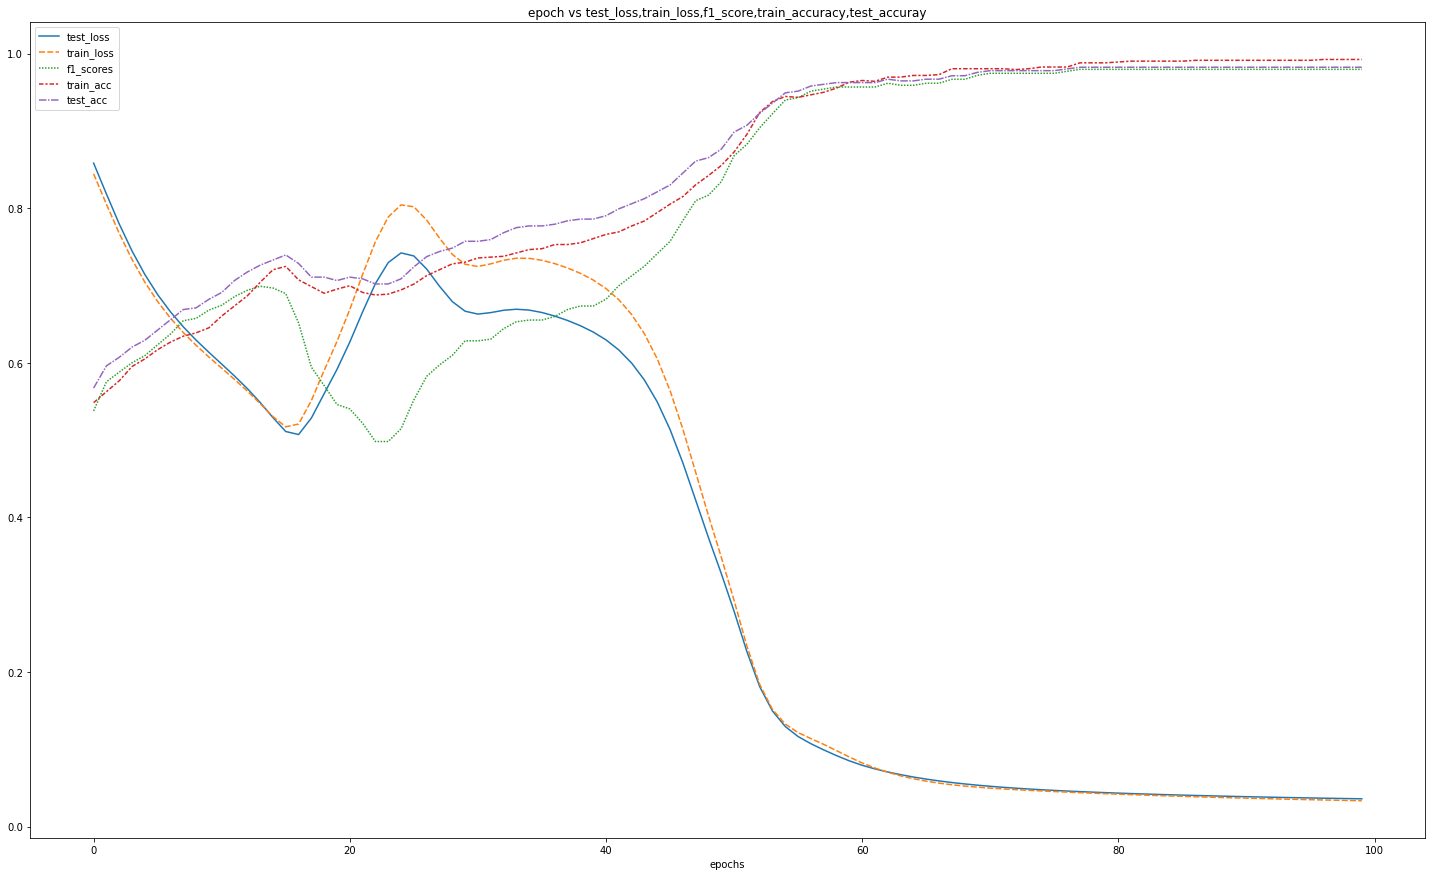

In [24]:
plt.figure(figsize=(25,15))
sns.lineplot(data=metrices_df)
plt.title('epoch vs test_loss,train_loss,f1_score,train_accuracy,test_accuray')
plt.xlabel('epochs')
# plt.legend('test_loss')

# sns.lineplot(data=train_loss)

# Weights Distribution

In [10]:
all_w_1 = model.all_w_1
all_w_2 = model.all_w_2
all_w_3 = model.all_w_3

In [12]:
len(all_w_1)
def plotting_distribution_weights(data,label):
    
    weight1_df = pd.DataFrame()
    for i in range(1,101,10):
        weight1_df['epoch '+str(i)]=data[i].flatten()
    
    sns.displot(weight1_df,kind='kde').set(title=label)

<Figure size 1440x720 with 0 Axes>

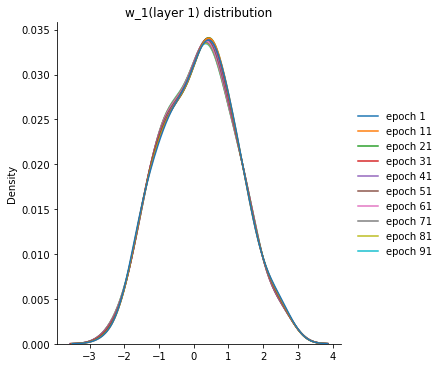

In [13]:
plt.figure(figsize=(20,10))
plotting_distribution_weights(all_w_1,'w_1(layer 1) distribution')

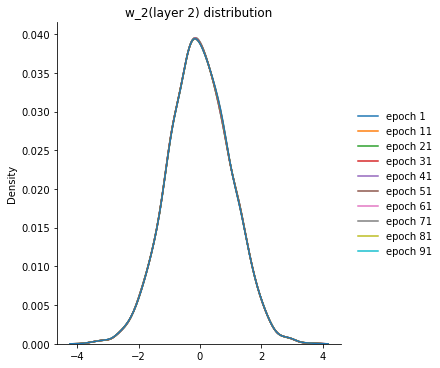

In [14]:
plotting_distribution_weights(all_w_2,'w_2(layer 2) distribution')

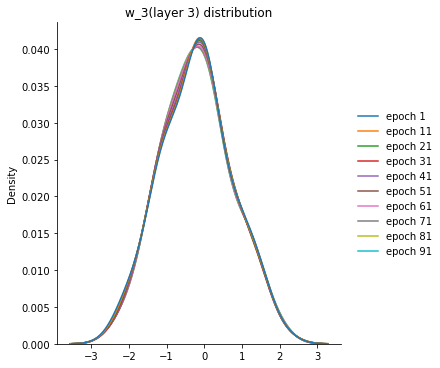

In [15]:
plotting_distribution_weights(all_w_3,'w_3(layer 3) distribution')

# Accuracy and F1-Score

In [16]:
a_3 = model.forward_propagate(X_test)

In [17]:
pred = np.argmax(a_3,axis=1)
true = np.argmax(y_test,axis=1)

In [18]:
print('accuracy_score on test data: ',accuracy_score(true,pred))

accuracy_score on test data:  0.9823399558498896


In [19]:
# f1_score(true,pred)
print('f1_score on test data: ',f1_score(true,pred))

f1_score on test data:  0.9795918367346939


# Confusion Matrix

In [20]:
confusion_matrix(true,pred)

array([[253,   4],
       [  4, 192]], dtype=int64)

---------------Confusion Matrix----------------


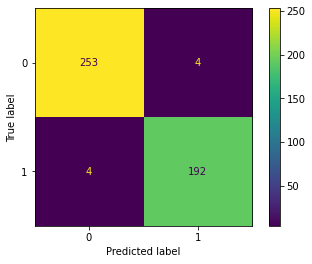

In [21]:
print('---------------Confusion Matrix----------------')
ConfusionMatrixDisplay(confusion_matrix(true,pred)).plot()